In [169]:
Packages <- c("dplyr", "ggplot2","stringr","fields", "tidyr",  "lubridate", "RColorBrewer", "igraph", "lubridate")

invisible(suppressPackageStartupMessages(lapply(Packages, library, character.only = TRUE)))

setwd('/local/home/katrinac/parentage/')

#download.file(url = "https://raw.githubusercontent.com/pinskylab/genomics/master/data/known_issues.csv", destfile = "~/parentage/r_data/known_issues.csv")
issues <- read.csv("~/parentage/r_data/known_issues.csv", header=T, stringsAsFactors = F)
#download.file(url = "https://github.com/pinskylab/Clownfish_persistence/blob/master/Data/Data_from_database/fish_db.RData?raw=true", destfile = "~/parentage/r_data/dives_db.RData")
load("~/parentage/r_data/fish_db.RData")
#download.file(url = "https://github.com/pinskylab/Clownfish_persistence/blob/master/Data/Data_from_database/anem_db.RData?raw=true", destfile = "~/parentage/r_data/anem_db.RData")
load("~/parentage/r_data/anem_db.RData")
#download.file(url = "https://github.com/pinskylab/Clownfish_persistence/blob/master/Data/Data_from_database/dives_db.RData?raw=true", destfile = "~/parentage/r_data/dives_db.RData")
load("~/parentage/r_data/dives_db.RData")
#download.file(url = "https://github.com/pinskylab/Clownfish_persistence/blob/master/Data/Data_from_database/fish_db.RData?raw=true", destfile = "~/parentage/r_data/dives_db.RData")
load("~/parentage/r_data/fish_db.RData")
load("~/parentage/r_data/gps_db.RData")
#download.file(url = "https://github.com/pinskylab/Clownfish_persistence/blob/master/Data/anems_tagged.RData", destfile = "~/parentage/r_data/anems_tagged.RData")
load("~/parentage/r_data/anems_tagged.RData")
#download.file(url = "https://github.com/pinskylab/genomics/blob/master/data/fish-obs.RData?raw=true", destfile = "~/parentage/r_data/fish-obs.RData")
fish_obs <- readRDS("~/parentage/r_data/fish-obs.RData") 
#download.file(url = "https://raw.githubusercontent.com/pinskylab/db_backups/master/ligation_1-7-20.csv", destfile = "~/parentage/r_data/ligation_db.csv")
lig_db <- read.csv("~/parentage/r_data/ligation_db.csv", header=T, stringsAsFactors = F)
#download.file(url = "https://raw.githubusercontent.com/pinskylab/db_backups/master/digest_1-7-20.csv", destfile = "~/parentage/r_data/digest_db.csv")
dig_db <- read.csv("~/parentage/r_data/digest_db.csv", header=T, stringsAsFactors = F)
#download.file(url = "https://raw.githubusercontent.com/pinskylab/db_backups/master/extraction_1-7-20.csv", destfile = "~/parentage/r_data/extraction_db.csv")
ext_db <- read.csv("~/parentage/r_data/extraction_db.csv", header=T, stringsAsFactors = F)
offs_input <- read.table(file="~/parentage/colony2/20190523_1340loci/input/all_offspring_corrected.txt", sep= " ", header=TRUE) %>%
    mutate(fish_indiv=as.character(fish_indiv))##read distance matrices in 
#dist12 <- read.csv("/local/home/katrinac/parentage/kernel_fitting/1340_loci/input/distance_matrix12.csv", header=F)
#dist13 <- read.csv("/local/home/katrinac/parentage/kernel_fitting/1340_loci/input/distance_matrix13.csv", header=F)
#dist14 <- read.csv("/local/home/katrinac/parentage/kernel_fitting/1340_loci/input/distance_matrix14.csv", header=F)
#dist15 <- read.csv("/local/home/katrinac/parentage/kernel_fitting/1340_loci/input/distance_matrix15.csv", header=F)
#dist16 <- read.csv("/local/home/katrinac/parentage/kernel_fitting/1340_loci/input/distance_matrix16.csv", header=F)
#dist17 <- read.csv("/local/home/katrinac/parentage/kernel_fitting/1340_loci/input/distance_matrix17.csv", header=F)
#dist18 <- read.csv("/local/home/katrinac/parentage/kernel_fitting/1340_loci/input/distance_matrix18.csv", header=F)
dist_all <- read.csv("/local/home/katrinac/parentage/kernel_fitting/1340_loci/input/distance_matrix_sampled.csv", header = F)

"%!in%" <- function(x,table) match(x,table, nomatch = 0) == 0


In [137]:
str(offs_input)

'data.frame':	791 obs. of  8 variables:
 $ fish_indiv : chr  "762" "2318" "409" "2317" ...
 $ year       : int  2012 2012 2012 2012 2012 2012 2012 2012 2012 2012 ...
 $ size       : num  5.1 4.1 4.5 5.1 4.1 5.4 5.5 4.8 5.3 5.3 ...
 $ color      : Factor w/ 9 levels "B","BW","O","W",..: 7 7 7 4 NA NA 7 4 NA 4 ...
 $ sex        : Factor w/ 1 level "J": 1 1 1 1 NA NA 1 1 NA 1 ...
 $ gen_id     : int  762 2318 409 2317 2072 92 267 148 199 121 ...
 $ ligation_id: Factor w/ 790 levels "L0256","L0258",..: 342 343 315 356 295 296 297 298 299 300 ...
 $ sample_id  : Factor w/ 790 levels "APCL12_023","APCL12_031",..: 57 60 61 33 13 14 15 18 19 20 ...


__import the .maternity & .paternity files__

In [8]:
##SEARCH AND REPLACE FOR YEAR for MATCHES
#par1 <- read.table(file= "/local/home/katrinac/parentage/colony2/20190523_1340loci/results/1340loci_2012.Maternity", header= TRUE, stringsAsFactors = F)	
#par2 <- read.table(file= "/local/home/katrinac/parentage/colony2/20190523_1340loci/results/1340loci_2012.Paternity", header= TRUE, stringsAsFactors = F)	
#
#
#par1 <- par1 %>% 
#    rename(offs_lig="OffspringID", par_lig = "InferredMum1", prob="ProbMum1")
#    
#par2 <- par2 %>% 
#    rename(offs_lig="OffspringID", par_lig = "InferredDad1", prob= "ProbDad1")
#
##bind together into 1 df
#par12 <- bind_rows(par1, par2) %>%
#    mutate(year="2012")
#

In [35]:
par18 <- read.csv(file= "/local/home/katrinac/parentage/colony2/20200605_1340loci/results/1340loci_2018.BestConfig.txt", header= TRUE, stringsAsFactors = F) %>%
    filter(grepl("L",FatherID) | grepl("L",MotherID)) %>% #get parentage results
    mutate(year="2018") %>%
    select(-CloneIndex, -ClusterIndex)

In [97]:
##bind all year parentage together
allpar <- bind_rows(par12, par13, par14, par15, par16, par17, par18) %>% 
    filter(MotherID !="L1091" | FatherID != "L1091") %>% #remove APCL13_128, the parent that moved (see later in script for explaination comment)
    gather(key=par_type, value=par_lig, 2:3) %>%
    filter(grepl("L",par_lig)) %>%
    rename(offs_lig="OffspringID") %>%
    select(-par_type)

nrow(allpar) #should be 
##replace NAs with zeros
##allpar$ProbMum1[is.na(allpar$ProbMum1)] <- 0
##allpar$ProbDad1[is.na(allpar$ProbDad1)] <- 0

[1] 85

In [10]:
#allpar_clean <- allpar %>%
#    group_by(offs_lig, par_lig) %>%
#    mutate(prob = sum(prob, na.rm = T)) %>% #add the probabilities when a parent was matched twice
#    ungroup()%>%
#    filter(prob >= 0.95) #remove low prob matches
#nrow(allpar_clean)
#nrow(distinct(allpar_clean, offs_lig))

[1] 86

[1] 62

In [65]:
#write.csv(allpar, file="~/parentage/colony2/20200605_1340loci/results/allpar_clean.csv", row.names=FALSE, quote=FALSE)




In [98]:
allpar_clean <- read.csv(file="~/parentage/colony2/20200605_1340loci/results/allpar_clean.csv", header=T, stringsAsFactors = F)

In [99]:
allpar_clean %>% filter(offs_lig == "L5292" | par_lig == "L5292 ")
nrow(allpar_clean)

offs_lig,year,par_lig


[1] 85

In [100]:
#summary numbers
n_total_matches <- allpar_clean %>%
    group_by(offs_lig) %>%
    mutate(n_parents=ifelse(n()==2, 2, 1 )) %>%
    distinct(offs_lig, .keep_all = T)


#so 62 parentage matches, of which 48 are trios
#how many in each year?
sum_offs <- allpar_clean %>%
    group_by(year) %>%
    distinct(offs_lig, .keep_all = T) %>%
    summarise(n_offs_matched=n())

sum(sum_offs$n_offs_matched)#check, should be 71
sum(n_total_matches$n_parents[n_total_matches$n_parents ==1])#should be 57
sum(n_total_matches$n_parents[n_total_matches$n_parents ==2])#should be 28
#REMEMBER I REMOVED ONE PARENT FROM THE RESULTS BECAUSE THE SITE ATTACHED TO THAT PARENT ISN'T WHERE THE LARVAE LIKELY ORIGINATED FROM
# 05/2019 results ->87 total matches, and of those 24 are repeats (trio matches). So, 86-48=38 maches to one parent. Then 24 matches to two parents, for a total of 62 rows of distinct offspring lig ids.


[1] 71

[1] 57

[1] 28

In [151]:
#from Allison, just putting all the meta data together (Constants_database_common_functions.R)
##### Match up other relevant info (site, date, fish_indiv, etc.) to fish in the clownfish table
# Pull out year and month into a separate column in dives_db
dives_db_processed <- dives_db %>%
  mutate(year = as.integer(substring(date,1,4))) %>%
  mutate(month = as.integer(substring(date,6,7))) %>%
  mutate(dive_date = date(date))

# Pull all APCL caught or otherwise in the clownfish table
allfish_fish <- fish_db %>%
  select(fish_table_id, anem_table_id, fish_spp, sample_id, anem_table_id, recap, tag_id, color, sex, size, fish_obs_time, fish_notes) %>%
  filter(fish_spp == 'APCL') %>%
  mutate(size = as.numeric(size))  # make the size numeric (rather than chr) so can do means and such

# and their corresponding anemones
allfish_anems <- anem_db %>%
  select(anem_table_id, dive_table_id, anem_obs, anem_id, old_anem_id, anem_notes, anem_obs_time) %>%
  filter(anem_table_id %in% allfish_fish$anem_table_id)

# and the corresponding dive info
allfish_dives <- dives_db_processed %>%
  select(dive_table_id, dive_type, date, year, month, site, gps, dive_notes) %>%
  filter(dive_table_id %in% allfish_anems$dive_table_id) 

# join together
allfish_caught <- left_join(allfish_fish, allfish_anems, by="anem_table_id")
allfish_caught <- left_join(allfish_caught, allfish_dives, by="dive_table_id")

# add in the gen_ids and fish_indiv (now in a separate gen_id table) - gen_id only comes in the time the fish was sequenced, not at all captures
allfish_caught <- left_join(allfish_caught, (fish_obs %>% select(fish_table_id, gen_id, fish_indiv)), by = "fish_table_id")

#get sample ids for ligation ids
ext_db <- ext_db %>%
    select(extraction_id, sample_id)
dig_db <- dig_db %>%
    select(extraction_id, digest_id)
lig_db <- lig_db %>%
    select(ligation_id, digest_id)
ext_dig <- left_join(ext_db, dig_db, by="extraction_id")
dig_lig <- left_join(ext_dig, lig_db, by="digest_id")
lig_samp <- dig_lig %>%
    select(ligation_id, sample_id) %>%
    filter(sample_id %in% allfish_caught$sample_id) #remove everything but sampled APCL

fish_meta <- left_join(allfish_caught, lig_samp,  by="sample_id") %>%
    select(fish_indiv, size, color, sex, gen_id, ligation_id, sample_id, site, date, anem_obs_time, gps) %>%
    filter(!is.na(fish_indiv)) %>%
    distinct(ligation_id, .keep_all = T) %>%
    mutate(ligation_year=year(date))


In [179]:
#get specific metadata for offspring
allpar_samp1 <- fish_meta %>%
    filter(ligation_id %in% allpar_clean$offs_lig) 
colnames(allpar_samp1) <- paste("offs", colnames(allpar_samp1), sep = "_")

#get specific metadata for parents
allpar_samp2 <- fish_meta %>%
    filter(ligation_id %in% allpar_clean$par_lig) 
colnames(allpar_samp2) <- paste("par", colnames(allpar_samp2), sep = "_")

#join back into parentage match format
meta_with_offs <- left_join(allpar_samp1, allpar_clean, by=c(offs_ligation_id="offs_lig"))
    

par_res <- left_join(allpar_samp2,meta_with_offs,  by=c(par_ligation_id="par_lig")) %>%
    filter(!is.na(par_ligation_id))

#the long haul of adding lat lons
results_meta <- par_res %>%
    mutate(offs_time_date =as.character(str_c(offs_date, offs_anem_obs_time, sep = " "))) %>%
    mutate(offs_time_date = ymd_hms(offs_time_date))%>%
    mutate(offs_time_date = force_tz(offs_time_date, tzone = "Asia/Manila")) %>%
    mutate(offs_time_date = with_tz(offs_time_date, tzone = "UTC")) %>%
    mutate(offs_year = year(offs_time_date)) %>%
    mutate(offs_month = month(offs_time_date)) %>%
    mutate(offs_day = day(offs_time_date)) %>%
    mutate(offs_hour = hour(offs_time_date)) %>%
    mutate(offs_minute = minute(offs_time_date)) %>%
    mutate(par_time_date =as.character(str_c(par_date, par_anem_obs_time, sep = " "))) %>%
    mutate(par_time_date = ymd_hms(par_time_date))%>%
    mutate(par_time_date = force_tz(par_time_date, tzone = "Asia/Manila")) %>%
    mutate(par_time_date = with_tz(par_time_date, tzone = "UTC")) %>%
    mutate(par_year = year(par_time_date)) %>%
    mutate(par_month = month(par_time_date)) %>%
    mutate(par_day = day(par_time_date)) %>%
    mutate(par_hour = hour(par_time_date)) %>%
    mutate(par_minute = minute(par_time_date))

gps <- gps_db %>%
    mutate(lat=as.numeric(lat)) %>%
    mutate(lon=as.numeric(lon)) %>%
    mutate(time_date = ymd_hms(time)) %>%
    mutate(year = year(time_date)) %>%
    mutate(month = month(time_date)) %>%
    mutate(day = day(time_date)) %>%
    mutate(hour = hour(time_date)) %>%
    mutate(minute = minute(time_date)) %>%
    select(-time_date, -elev, -time) %>%
    group_by(unit, year, month, day, hour, minute) %>%
    mutate(lat =mean(lat)) %>% #create within minute averages
    mutate(lon=mean(lon)) %>%
    distinct(.keep_all = T)

add_offs_loc <- left_join(results_meta, gps, by=c(offs_gps="unit",offs_year="year", offs_month="month", offs_day="day", offs_hour="hour", offs_minute="minute")) %>%
    rename(offs_lat="lat", offs_lon="lon") 

results_dist <- left_join(add_offs_loc, gps, by=c(par_gps="unit",par_year="year", par_month="month", par_day="day", par_hour="hour", par_minute="minute")) %>%
    rename(par_lat="lat", par_lon="lon") 
dim(results_dist) #should be 85

[1] 85 41

In [180]:
nrow(results_dist)

[1] 85

In [181]:

#calculate the distance from mom then from dad, use the average between the two to get net dispersal distance
alldists <- rdist.earth(as.matrix(results_dist[,c('offs_lon', 'offs_lat')]), as.matrix(results_dist[,c('par_lon', 'par_lat')]), miles=FALSE, R=6371)
results_dist$dist_par_km <- diag(alldists)




In [156]:
nrow(results_dist %>% distinct(offs_fish_indiv))

[1] 71

In [166]:
#visually inspect that parents in trios aren't too far apart. They aren't. When the gps location is different, they are at least in the same site, and once in adjacent sites
results_dist %>%
    group_by(offs_fish_indiv) %>%
    filter(n()>1) %>%
    arrange(offs_fish_indiv) %>%
    select(offs_fish_indiv, offs_site, par_fish_indiv, par_site, everything())

offs_fish_indiv,offs_site,par_fish_indiv,par_site,par_size,par_color,par_sex,par_gen_id,par_ligation_id,par_sample_id,...,par_time_date,par_year,par_month,par_day,par_hour,par_minute,offs_lat,offs_lon,par_lat,par_lon
1874,Palanas,1243,Palanas,10.1,O,M,1243,L5202,APCL16_040,...,2016-05-13 03:06:00,2016,5,13,3,6,10.87279,124.7118,10.87417,124.7108
1874,Palanas,2405,Palanas,10.2,O,M,2405,L5169,APCL16_038,...,2016-05-13 03:07:00,2016,5,13,3,7,10.87279,124.7118,10.87418,124.7107
1882,San Agustin,2683,Palanas,11.0,YP,F,2683,L3629,APCL16_067,...,2016-05-13 07:24:00,2016,5,13,7,24,10.76851,124.7841,10.87382,124.7108
1882,San Agustin,2616,Palanas,7.2,O,M,2616,L2917,APCL15_400235,...,2015-05-30 07:55:00,2015,5,30,7,55,10.76851,124.7841,10.87352,124.7118
224,Poroc San Flower,196,S. Magbangon,9.1,O,M,196,L2567,APCL12_145,...,2012-05-10 03:15:00,2012,5,10,3,15,10.76404,124.7852,10.85723,124.7249
224,Poroc San Flower,2050,S. Magbangon,9.3,Y,F,2050,L2224,APCL12_144,...,2012-05-10 03:15:00,2012,5,10,3,15,10.76404,124.7852,10.85723,124.7249
2297,Cabatoan,448,Palanas,10.1,O,M,448,L0733,APCL14_176,...,2014-06-17 02:52:00,2014,6,17,2,52,10.85532,124.7263,10.87395,124.7105
2297,Cabatoan,2056,Palanas,9.8,Y,F,2056,L1763,APCL12_095,...,2012-05-09 04:33:00,2012,5,9,4,33,10.85532,124.7263,10.87354,124.7119
2704,Palanas,498,Palanas,9.6,O,M,498,L0957,APCL14_165,...,2014-06-17 02:11:00,2014,6,17,2,11,10.87374,124.7112,10.87378,124.7109
2704,Palanas,1679,Palanas,11.8,YP,F,1679,L3425,APCL17_065,...,2017-05-15 05:23:24,2017,5,15,5,23,10.87374,124.7112,10.87398,124.7108


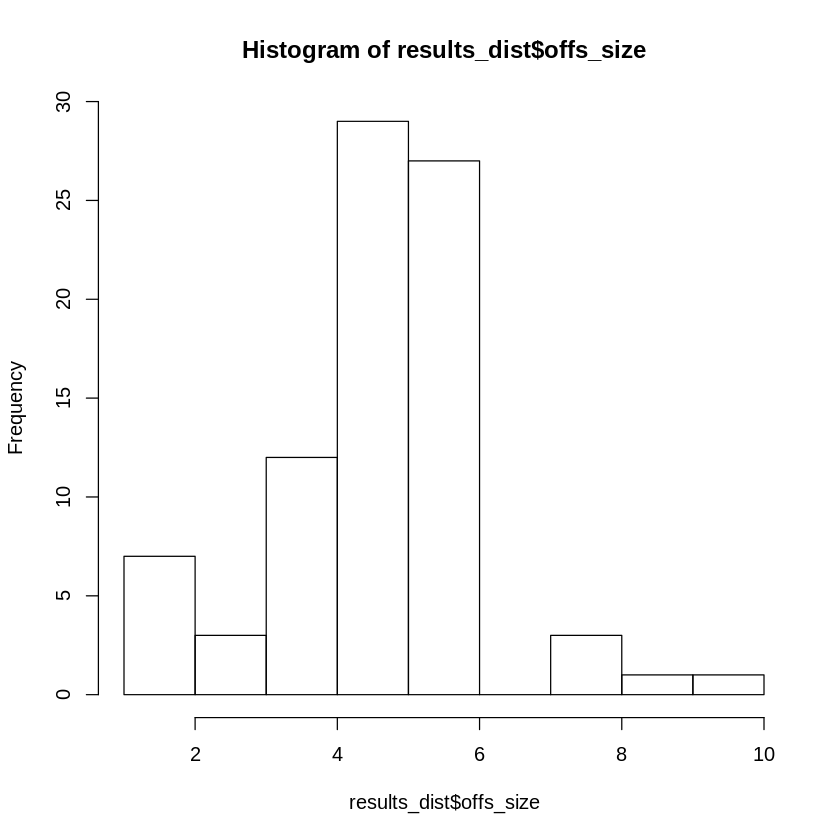

In [157]:
hist(results_dist$offs_size) #there will be offspring that are too big because the ligation id that was used in parentage isn't from the same year that the fish was used in the parentage analysis


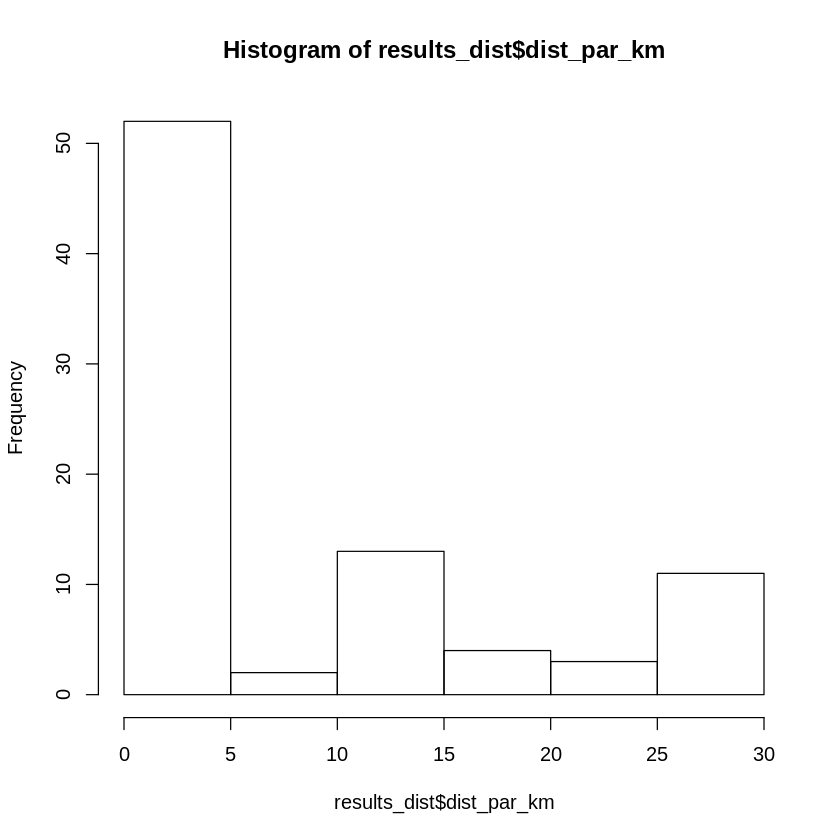

In [182]:
#png('~/parentage/colony2/20200605_1340loci/results/dispersal_dist_hist.png')
hist(results_dist$dist_par_km) #cool.
#dev.off()

In [160]:
#write.table(results_dist, file="~/parentage/kernel_fitting/1340_loci/parentage_results_allyears.csv", row.names=FALSE, quote=FALSE, col.names=T, sep=",")
#write.table(results_dist, file="~/parentage/colony2/20200605_1340loci/results/parentage_results_allyears.csv", row.names=FALSE, quote=FALSE, col.names=T, sep=",")

In [164]:
#this cell for bode kernel estimate input
par12 <- results_dist %>%
    filter(year=="2012") %>%
    distinct(offs_sample_id, .keep_all = T) %>%
    select(year, offs_site, par_site) #sort by parent year for the table for malin
dim(par12)

par13 <- results_dist %>%
    filter(year=="2013") %>%
    distinct(offs_sample_id, .keep_all = T) %>%
    select(year, offs_site, par_site) #sort by parent year for the table for malin
dim(par13)

par14 <- results_dist %>%
    filter(year=="2014") %>%
    distinct(offs_sample_id, .keep_all = T) %>%
    select(year, offs_site, par_site) #sort by parent year for the table for malin
dim(par14)

par15 <- results_dist %>%
    filter(year=="2015") %>%
    distinct(offs_sample_id, .keep_all = T) %>%
    select(year, offs_site, par_site) #sort by parent year for the table for malin
dim(par15)

par16 <- results_dist %>%
    filter(year=="2016") %>%
    distinct(offs_sample_id, .keep_all = T) %>%
    select(year, offs_site, par_site) #sort by parent year for the table for malin
dim(par16)

par17 <- results_dist %>%
    filter(year=="2017") %>%
    distinct(offs_sample_id, .keep_all = T) %>%
    select(year, offs_site, par_site) #sort by parent year for the table for malin
dim(par17)

par18 <- results_dist %>%
    filter(year=="2018") %>%
    distinct(offs_sample_id, .keep_all = T) %>%
    select(year, offs_site, par_site) #sort by parent year for the table for malin
dim(par18)

par_all <- results_dist %>%
    select(year, offs_site, par_site)
nrow(par12)+nrow(par13)+nrow(par14)+nrow(par15)+nrow(par16)+nrow(par17)+nrow(par18)
nrow(par_all)

[1] 3 3

[1] 21  3

[1] 13  3

[1] 11  3

[1] 6 3

[1] 13  3

[1] 4 3

[1] 71

[1] 85

In [192]:
par16

year,offs_site,par_site
2016,N. Magbangon,Hicgop South
2016,N. Magbangon,Tamakin Dacot
2016,N. Magbangon,Hicgop South
2016,S. Magbangon,Wangag
2016,Gabas,Wangag
2016,San Agustin,Wangag


In [194]:
##write for bode dispersal kernel estimate with all matches
#write.csv(par12, file="~/parentage/kernel_fitting/1340_loci/results/parentage12.csv", quote=TRUE, row.names= FALSE)
#write.csv(par13, file="~/parentage/kernel_fitting/1340_loci/results/parentage13.csv", quote=TRUE, row.names= FALSE)
#write.csv(par14, file="~/parentage/kernel_fitting/1340_loci/results/parentage14.csv", quote=TRUE, row.names= FALSE)
#write.csv(par15, file="~/parentage/kernel_fitting/1340_loci/results/parentage15.csv", quote=TRUE, row.names= FALSE)
#write.csv(par16, file="~/parentage/kernel_fitting/1340_loci/results/parentage16.csv", quote=TRUE, row.names= FALSE)
#write.csv(par17, file="~/parentage/kernel_fitting/1340_loci/results/parentage17.csv", quote=TRUE, row.names= FALSE)
#write.csv(par18, file="~/parentage/kernel_fitting/1340_loci/results/parentage18.csv", quote=TRUE, row.names= FALSE)
#write.csv(par_all, file="~/parentage/kernel_fitting/1340_loci/results/parentage_all.csv", quote=TRUE, row.names= FALSE)
#

In [174]:
fish_meta <- fish_meta %>%
    mutate(time_date =as.character(str_c(date, anem_obs_time, sep = " "))) %>%
    mutate(time_date = ymd_hms(time_date))%>%
    mutate(time_date = force_tz(time_date, tzone = "Asia/Manila")) %>%
    mutate(time_date = with_tz(time_date, tzone = "UTC")) %>%
    mutate(year = year(time_date)) %>%
    mutate(month = month(time_date)) %>%
    mutate(day = day(time_date)) %>%
    mutate(hour = hour(time_date)) %>%
    mutate(minute = minute(time_date)) 

gps <- gps_db %>%
    mutate(lat=as.numeric(lat)) %>%
    mutate(lon=as.numeric(lon)) %>%
    mutate(time_date = ymd_hms(time)) %>%
    mutate(year = year(time_date)) %>%
    mutate(month = month(time_date)) %>%
    mutate(day = day(time_date)) %>%
    mutate(hour = hour(time_date)) %>%
    mutate(minute = minute(time_date)) %>%
    select(-time_date, -elev, -time) %>%
    group_by(unit, year, month, day, hour, minute) %>%
    mutate(lat =mean(lat)) %>% #create within minute averages
    mutate(lon=mean(lon)) %>%
    distinct(.keep_all = T)

add_loc <- left_join(fish_meta, gps, by=c(gps="unit", "year", "month", "day", "hour", "minute")) 

In [184]:
#use distance matrix to plot dispersal in each year
distall_df <- data.frame(dist=as.vector(as.matrix(dist_all)))

#get a df of all distances between sampled fish as possible dispersal distances
#both axes have to be proportions for stupid ggplot
#all_sampled_fish <- fish_obs  %>%
#    distinct(fish_indiv, `.keep_all` = T)
all_sampled_fish_loc <- add_loc %>%
    filter(!is.na(lat) & !is.na(lon))
all_sampled_dists <- rdist.earth(as.matrix(all_sampled_fish_loc[,c('lon', 'lat')]), as.matrix(all_sampled_fish_loc[,c('lon', 'lat')]), miles=FALSE, R=6371)

all_sampled_dists_df <- data.frame(dist=as.vector(as.matrix(all_sampled_dists))) %>%
    mutate(dist=round(dist, digits=0)) %>%
    group_by(dist) %>%
    mutate(freq=n()) %>%
    mutate(prop=freq/sum(freq))
           
obs_disp_dist_prop <- results_dist %>%
    #filter(year==2018) %>%
    distinct(offs_fish_indiv, .keep_all = T) %>% 
    mutate(dist_par_km = ifelse(dist_par_km >27, floor(dist_par_km), dist_par_km)) %>%
    mutate(dist_par_km = ifelse(dist_par_km <1, ceiling(dist_par_km), dist_par_km)) %>%
    group_by(dist_par_km) %>%
    mutate(n_freq=n()) %>%
    ungroup() %>%
    mutate(prop=n_freq/sum(n_freq))


In [186]:
options(scipen=999)
# use these variables to set the limits on all plots
#y1max = max(obs_disp_dist_prop$dist_par_km)

#quartzFonts(avenir = c("Avenir Book", "Avenir Black", "Avenir Book Oblique", 
#        "Avenir Black Oblique"))
par(family = "Helvetica")
pdf("~/parentage/colony2/20200605_1340loci/results/disp_dist_pub.pdf")


par(mar=(c(5, 5, 5, 5))) 
with(all_sampled_dists_df, hist(dist, ylim = c(0, max(freq)+2000000), main=NA, axes=F, xlab=NA, ylab=NA, breaks=seq(0, 30, 1), col=scales::alpha('gray',.5), border=F))
legend("topright", legend=c("Observed dispersal", "Sampled distances"),
       fill=c(scales::alpha('orange',.5), scales::alpha('gray',.5)), cex=0.8, box.lty=0)
axis(4)
mtext(side = 4, line = 3, "Frequency")
#lines(density(per_cur), col="blue",lwd=2)

#add obs with a secondary y-axis

par(new = TRUE)
with(obs_disp_dist_prop, hist(dist_par_km, ylim = c(0, 50), main=NA, breaks=seq(0, 30, 1), xlab="Distance (km)",col=scales::alpha('orange',.5), border=F))

dev.off()




png 
  2

In [189]:
#find means 
results_dist$year <- as.numeric(results_dist$year)
means <- results_dist %>%
    ungroup() %>%
    group_by(year) %>%
    distinct(offs_fish_indiv, .keep_all = T) %>%
    summarise(mean_disp_dist=mean(dist_par_km))
 

dispersal_raw_results <- left_join(sum_offs, means, by="year")
dispersal_raw_results
write.table(dispersal_raw_results, file="~/parentage/colony2/20200605_1340loci/results/dispersal_raw_results.txt", row.names=FALSE, quote=FALSE, col.names=T, sep=" ")

year,n_offs_matched,mean_disp_dist
2012,3,8.945754
2013,21,6.756019
2014,13,8.304422
2015,11,6.860867
2016,6,12.125406
2017,13,9.494940
2018,4,6.676322


In [191]:
png('~/parentage/colony2/20200605_1340loci/results/dispersal_dist_hist.png')
plot(dispersal_raw_results$mean_disp_dist, dispersal_raw_results$n_offs_matched)
dev.off()

png 
  2

In [200]:
#read in results post-processing
results_dist <- read.csv(file="~/parentage/colony2/20200605_1340loci/results/parentage_results_allyears.csv", header=T)

In [202]:
nrow(results_dist %>% distinct(offs_fish_indiv, .keep_all = T))

[1] 71

In [29]:
##what about adding in results from sibling matches?
##SEARCH AND REPLACE FOR YEAR 4 MATCHES
#full_sib <- read.table(file= "/local/home/katrinac/parentage/colony2/20190523_1340loci/results/1340loci_2018.FullSibDyad", sep=",", header= TRUE, stringsAsFactors = F)	
#half_sib <- read.table(file= "/local/home/katrinac/parentage/colony2/20190523_1340loci/results/1340loci_2018.HalfSibDyad", sep=",", header= TRUE, stringsAsFactors = F)	
#
#
#full_sib <- full_sib %>% 
#    rename(sib1_lig="OffspringID1", sib2_lig = "OffspringID2", prob="Probability") %>%
#    mutate(type="full")
#
#half_sib <- half_sib %>% 
#    rename(sib1_lig="OffspringID1", sib2_lig = "OffspringID2", prob="Probability") %>%
#    mutate(type="half")
#
###bind together into 1 df
#sib18 <- bind_rows(full_sib, half_sib) %>%
#    mutate(year="2018")
##
##


In [76]:
###bind all years of parentage together
#allsibs <- bind_rows(sib12, sib13, sib14, sib15, sib16, sib17, sib18)
#
##nrow(allsibs) 
#
#allsibs_clean <- allsibs %>%
#    group_by(sib1_lig, sib2_lig) %>%
#    mutate(prob = sum(prob, na.rm = T)) %>% #add the probabilities when a parent was matched twice
#    ungroup()%>%
#    filter(prob >= 0.95) #remove low prob matches
#
#nrow(allsibs_clean)



In [80]:
#write.csv(allsibs_clean, file="~/parentage/colony2/20190523_1340loci/allsibs_clean.csv", row.names=FALSE, quote=FALSE)



## migest prep? 

In [122]:
trios <- results_dist %>%
    group_by(offs_lig, .keep_all = T) %>% 
    filter(n()==2) %>%
    filter(row_number()==1)  

n_trios<- trios %>%
    ungroup() %>%
    select(year, offs_site, par_site) %>%
    group_by(year, offs_site, par_site) %>%
    summarise(n_trios=n())
sum(n_trios$n_trios) #should be 24

write.csv(n_trios, file="~/parentage/colony2/20190523_1340loci/results/1340_colony_migest_trios_allyears.csv", quote=TRUE, row.names= FALSE)


  



[1] 24

In [121]:
#read in who was in mum/dad file. Totally arbitrary way to sort sex but it will do 
mum <- read.table(file= "/local/home/katrinac/parentage/colony2/20190523_1340loci/results/1340loci_in_mum_output.txt", header= TRUE, stringsAsFactors = F) %>%
    rename(offs_lig="OffspringID", par_lig = "InferredMum1", prob= "ProbMum1") %>%
    filter(par_lig !="L1091") %>%#remove APCL13_128, the parent that moved (see later in script for explaination comment)filter(par_lig !="L1091")#remove APCL13_128, the parent that moved (see later in script for explaination comment)
    group_by(offs_lig, par_lig) %>%
    mutate(prob = sum(prob, na.rm = T)) %>% #add the probabilities when a parent was matched twice
    ungroup()%>%
    filter(prob >= 0.95)

dad <- read.table(file= "/local/home/katrinac/parentage/colony2/20190523_1340loci/results/1340loci_in_dad_output.txt", header= TRUE, stringsAsFactors = F) %>%
    rename(offs_lig="OffspringID", par_lig = "InferredDad1", prob= "ProbDad1") %>%
    filter(par_lig !="L1091") %>%#remove APCL13_128, the parent that moved (see later in script for explaination comment)filter(par_lig !="L1091")#remove APCL13_128, the parent that moved (see later in script for explaination comment)
    group_by(offs_lig, par_lig) %>%
    mutate(prob = sum(prob, na.rm = T)) %>% #add the probabilities when a parent was matched twice
    ungroup()%>%
    filter(prob >= 0.95)

In [132]:

#make separate mum and dad input files
n_mums_notrios <- results_dist %>%
    ungroup() %>%
    filter(offs_lig %!in% trios$offs_lig & offs_lig %in% mum$offs_lig)%>%
    select(year, offs_site, par_site) %>%
    group_by(year, offs_site, par_site) %>%
    summarise(n_mum=n())


n_dads_notrios <- results_dist %>%
    ungroup() %>%
    filter(offs_lig %!in% trios$offs_lig & offs_lig %in% dad$offs_lig)%>%
    select(year, offs_site, par_site) %>%
    group_by(year, offs_site, par_site) %>%
    summarise(n_dad=n())

write.csv(n_mums_notrios, file="~/parentage/colony2/20190523_1340loci/results/1340_colony_migest_mums_allyears.csv", quote=TRUE, row.names= FALSE)
write.csv(n_dads_notrios, file="~/parentage/colony2/20190523_1340loci/results/1340_colony_migest_dads_allyears.csv", quote=TRUE, row.names= FALSE)





In [130]:
sum(n_mums_notrios$n_mum) + sum(n_dads_notrios$n_dad) +sum(n_trios$n_trios)
#should be 62

[1] 62

In [34]:
###should delete? 
col <- "sites"
sites <-as.data.frame(c("Gabas", "Caridad Cemetery", "Caridad Proper", "Poroc Rose", "Poroc San Flower", "Visca", "Sitio Baybayon", "Palanas", "Wangag","Magbangon", "Cabataon", "Haina", "Tamakin Dacot", "Sitio Tugas", "Sitio Lonas", "Elementery School", "San Agustin", "Hicgop South"))
colnames(sites) <- col
sites <- arrange(sites, sites)
#write male/female specific parentage matrix 
#write.csv(par_mat_MF, file="~/parentage/colony2/20180712_2188loci/results/20180713colony_migest_table_allyears.csv", quote=TRUE, row.names= FALSE)



In [30]:
###ASIDE CELL, USED TO MAKE A TABLE OF PARENT-OFFSPRING YEARS FOR MALIN 10/17/2018
#count the number of each pairwise site combination and year
#
#dim(par12)
#dim(par13)
#dim(par14)
#dim(par15)
#
#
#parent_counts12 <- par12 %>%
#    group_by(year, parent_year) %>%
#    summarise(n_parentage_matches=n()) %>%
#    rename(offspring_year= year)
#
#parent_counts13 <- par13 %>%
#    group_by(year, parent_year) %>%
#    summarise(n_parentage_matches=n()) %>%
#    rename(offspring_year= year)
#
#parent_counts14 <- par14 %>%
#    group_by(year, parent_year) %>%
#    summarise(n_parentage_matches=n()) %>%
#    rename(offspring_year= year)
#
#parent_counts15 <- par15 %>%
#    group_by(year, parent_year) %>%
#    summarise(n_parentage_matches=n()) %>%
#    rename(offspring_year= year)
#
#
#
#all_parent_counts <- bind_rows(parent_counts12, parent_counts13, parent_counts14, parent_counts15)
#
#write.csv(all_parent_counts, file="~/parentage/20181017_allparentage_matches_year.csv", quote=FALSE, row.names= FALSE)


## Directionality

In [205]:
str(results_dist)

'data.frame':	85 obs. of  42 variables:
 $ par_fish_indiv    : int  25 124 132 133 133 146 150 196 962 235 ...
 $ par_size          : num  10.4 7.5 8 9 9 10.4 9.7 9.1 9.8 9.1 ...
 $ par_color         : Factor w/ 4 levels "O","Y","YP","YR": 3 NA NA 1 1 NA 1 1 1 1 ...
 $ par_sex           : Factor w/ 3 levels "F","J","M": 1 NA NA 3 3 NA 3 3 3 3 ...
 $ par_gen_id        : int  25 124 132 133 133 146 150 196 962 235 ...
 $ par_ligation_id   : Factor w/ 73 levels "L0328","L0384",..: 33 30 29 31 31 37 38 43 39 25 ...
 $ par_sample_id     : Factor w/ 73 levels "APCL12_030","APCL12_088",..: 25 8 7 9 9 1 5 12 10 2 ...
 $ par_site          : Factor w/ 12 levels "Cabatoan","Haina",..: 11 12 12 12 12 11 5 7 1 5 ...
 $ par_date          : Factor w/ 39 levels "2012-05-06","2012-05-09",..: 12 2 2 2 2 1 2 3 3 2 ...
 $ par_anem_obs_time : Factor w/ 63 levels "09:23:00","09:25:00",..: 63 51 53 49 49 58 38 21 8 32 ...
 $ par_gps           : int  1 1 1 1 1 1 1 1 1 1 ...
 $ par_ligation_year : int  2013 20

In [208]:
### Assesing directionality
#read in sites NS
sites_ns <- read.table(file="~/parentage/text_file/sites_NS.txt", header=T, sep=",")

#gather the distance from parent information to visulize the dispersal distances KEEP sites
par_mat_dist <- results_dist %>%
    ungroup() %>%
    select(offs_fish_indiv, offs_sample_id, year, par_fish_indiv, par_sample_id, dist_par_km, offs_site, par_site) %>%
    distinct(offs_fish_indiv, .keep_all = T)



In [59]:
#TEST SEASONALITY

#sites_ns <- read.table(file="~/parentage/text_file/sites_NS.txt", header=T, sep=",")
#
##gather the distance from parent information to visulize the dispersal distances KEEP sites
#par_mat_dist <- results_dist %>%
#    ungroup() %>%
#    filter(offs_fish_indiv %in% small$fish_indiv) %>%
#    select(offs_lig,offs_samp, year, par_lig, par_samp, dist_par_km, offs_site, par_site) %>%
#    distinct(offs_lig, .keep_all = T)
#
#

In [209]:
#join to parentage tables
offs_index <- left_join(par_mat_dist, sites_ns, by=c(offs_site ="site")) %>%
    rename(offs_index="index")
par_directionality <- left_join(offs_index, sites_ns, by=c(par_site="site")) %>%
    rename(par_index="index") %>%
    filter(offs_index!=par_index) %>% #get rid of self-recruitment back to the site, our gps points are fuzzy so best to leave those out
    mutate(direction=ifelse(par_index > offs_index, "south", "north")) #each offspring and parent site has an index number 1-19, North to South. Add in a column for dirrectionality
#add in the self-recruitment values
sr <- left_join(offs_index, sites_ns, by=c(par_site="site")) %>%
    rename(par_index="index") %>%
    filter(offs_index==par_index) %>% 
    mutate(direction="self")

disp_direction <- bind_rows(par_directionality, sr)


Warning message:
“Column `offs_site`/`site` joining factors with different levels, coercing to character vector”Warning message:
“Column `par_site`/`site` joining factors with different levels, coercing to character vector”Warning message:
“Column `par_site`/`site` joining factors with different levels, coercing to character vector”

In [210]:
# loop through par_index and assign a North or South value for each parentage match
#par_index

In [212]:
write.csv(disp_direction, file="~/parentage/colony2/20200605_1340loci/results/20200624colony_dispersaldirection.csv", quote=TRUE, row.names= FALSE)



## Preliminary plots

In [33]:
#gather the distance from parent information to visulize the dispersal distances rather than sites
par1_mat_dist <- no_suspect %>%
    ungroup() %>%
    select(offs_ligation_id, year, par1_ligation_id, dist_par1_km) %>%
    rename(par_ligation_id="par1_ligation_id", par_dist="dist_par1_km")
par2_mat_dist <- no_suspect %>%
    ungroup() %>%
    select(offs_ligation_id, year, par2_ligation_id, dist_par2_km) %>%
    rename(par_ligation_id="par2_ligation_id", par_dist="dist_par2_km")

In [34]:
par_mat_dist <- bind_rows(par1_mat_dist, par2_mat_dist)
par_mat_dist_fin <- par_mat_dist %>% 
    filter(par_ligation_id !="NA")%>%
    filter(par_dist != "NA") %>%
    group_by(offs_ligation_id) %>%
    filter(row_number()==1)

In [35]:
dim(par_mat_dist_fin)

[1] 89  4

In [30]:
#write out to plot distances 
write.csv(par_mat_dist_fin, file="~/parentage/colony2/20180712_2188loci/results/20180911colony_pardist_allyears.csv", quote=TRUE, row.names= FALSE)



## what does this look like for annual distance?

In [44]:
means

year,mean
2012,6.772821
2013,8.120695
2014,3.302044
2015,3.467952


In [47]:
dist_cdf <- ggplot(par_mat_fin_dist, aes(x=par_dist)) + stat_ecdf(aes(colour=year), geom="step") +
    geom_hline(yintercept=.5, linetype="dashed")

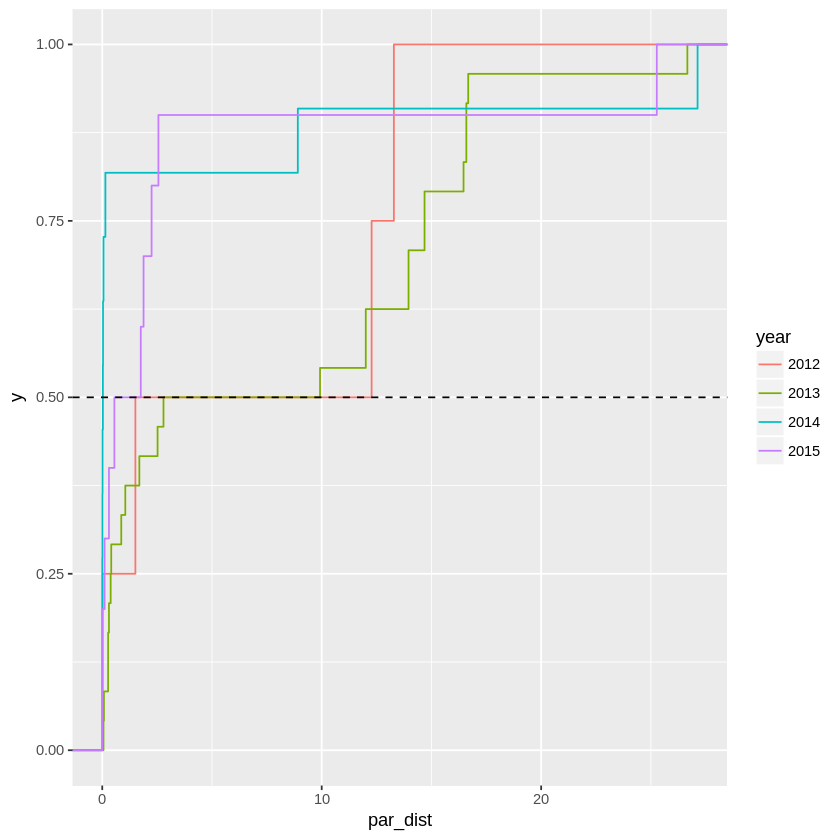

In [48]:
dist_cdf

In [34]:
head(results_dist)

par_samp,par_fish_indiv,offs_samp,offs_fish_indiv,offs_lig,par_lig,prob,year,par_size,par_color,⋯,offs_size,offs_color,offs_sex,offs_lat,offs_lon,offs_site,par_lat,par_lon,par_site,dist_par_km
APCL13_510,25,APCL13_507,645,L2396,L2238,1,2013,10.4,YP,⋯,4.1,YR,J,10.74343,124.7869,Visca,10.74427,124.7865,Visca,0.1049982
APCL12_110,124,APCL13_489,770,L0660,L1770,1,2013,7.5,NA,⋯,4.2,YR,J,10.87312,124.7121,Palanas,10.87166,124.7140,Wangag,0.2673390
APCL12_109,132,APCL13_489,770,L0660,L1769,1,2013,8.0,NA,⋯,4.2,YR,J,10.87312,124.7121,Palanas,10.87165,124.7141,Wangag,0.2708801
APCL12_117,133,APCL13_490,601,L0661,L2217,1,2013,9.0,O,⋯,2.3,YR,J,10.87312,124.7121,Palanas,10.87168,124.7140,Wangag,0.2618357
APCL12_117,133,APCL13_388,646,L0398,L2217,1,2013,9.0,O,⋯,3.3,W,J,10.86902,124.7165,Wangag,10.87168,124.7140,Wangag,0.4013014
APCL12_030,146,APCL13_245,312,L0278,L2345,1,2013,10.4,NA,⋯,3.8,YR,J,10.87427,124.7107,Palanas,10.74399,124.7863,Visca,16.6768523


### BEGIN REGENOTYPE TROUBLESHOOTING

In [47]:
#(results %>% filter(offs_gen==par1_gen))
#(results %>% filter(offs_gen==par2_gen))

#bring the par1 and par2 columns together for a single par column
no_repeats1 <-results %>% 
    select(offs_lig, offs_samp, offs_gen, par1_lig, par1_samp, par1_gen) %>%
    rename(par_lig ="par1_lig", par_samp="par1_samp", par_gen = "par1_gen")


no_repeats2 <-results %>% 
    select(offs_lig, offs_samp, offs_gen, par2_lig, par2_samp, par2_gen) %>%
    rename(par_lig ="par2_lig", par_samp="par2_samp", par_gen = "par2_gen")

test <- bind_rows(no_repeats1, no_repeats2) %>%
    filter(par_lig!= "NA") %>%
    group_by(offs_lig, offs_samp, offs_gen, par_lig, par_samp, par_gen) %>%
    distinct(offs_gen, par_gen, .keep_all=T) %>%  #filter to only distinct offspring matches, should be 82 rows with a par1 and a par2 column set up
    ungroup()
dim(test)

[1] 103   6

In [73]:
par_itself <- test %>% 
    filter(offs_gen == par_gen) #REMOVE REGENOS THAT SLIPPED THROUGH IN FILE PREP, 9 instances of a parent-offspring match that is a regenotype

repeated_offs <- test %>% 
    group_by(offs_gen, par_gen) %>% 
    filter(n()>1) %>% 
    arrange(offs_gen) %>% 
    ungroup() %>%
    filter(offs_gen != par_gen) #REMOVE REGENOS IN THE OFFSPRING THAT SHOWED UP AS MULTIPLE OFFSPRING
#save data and upload to github
saveRDS(par_itself, file = "~/parentage/regenotypes_misidentified_as_parentage.rds")
saveRDS(repeated_offs, file = "~/parentage/regenotypes_misidentified_as_multiple offspring.rds")

all_repeats <- bind_rows(par_itself, repeated_offs)
dim(all_repeats)

In [76]:
#are the regenotypes that snuck in fish that were regenotyped more than two times? This is my theory about how this happened, I filtered out regenotypes that were two ligations but those that were more slipped in. 
#get the all the gen_ids associated with all fish
fish_samped <- get_fish() %>% 
    filter(sample_id != "NA")
#fish_allids <- get_samp(fish$sample_id)
dim(fish_samped) #why do some fish have sample_id but no gen_id?
fish_gened <- get_fish() %>% 
    filter(sample_id != "NA" & gen_id != "NA")
dim(fish_gened)# it's because they just didn't get sequenced, because this data frame with only fish with sample_ids and gen_ids matches the number of fish Michelle said sequenced properly

fish_gened_mult <- get_fish() %>% 
    filter(sample_id != "NA" & gen_id != "NA") %>%
    group_by(gen_id) %>%
    filter(n()>2)
dim(fish_gened_mult)


#look for fish that have more than two ligation_ids and see if they are the ones that made it into the parentage analysis
multiple_regenos <- all_repeats %>%
    filter(offs_gen %in% fish_gened_mult$gen_id | par_gen)

dim(multiple_regenos)# YUP. That's it. My whole repeat data frame is regenotyped more than twice.

[1] 4314    6

[1] 2585    6

[1] 97  6

[1] 25  6

### END REGENOTYPE TROUBLESHOOTING